In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Hartmann6d function

In [2]:
def hartmann(x1,x2,x3,x4,x5,x6):

	A = [[10,3,17,3.5,1.7,8],[0.05,10,17,0.1,8,14],[3,3.5,1.7,10,17,8],[17,8,0.05,10,0.1,14]]

	A = np.array(A)

	P = [[1312,1696,5569,124,8283,5886],[2329,4135,8307,3736,1004,9991],[2348,1451,3522,2883,3047,6650],[4047,8828,8732,5743,1091,381]]

	P = np.array(P)
	P = 1e-4*P

	alpha = [1.0,1.2,3.0,3.2]

	expVal = np.exp((-(A[:,0]*(x1-P[:,0])**2 + A[:,1]*(x2-P[:,1])**2 + A[:,2]*(x3-P[:,2])**2 + A[:,3]*(x4-P[:,3])**2 + A[:,4]*(x5-P[:,4])**2 + A[:,5]*(x6-P[:,5])**2)))
	y = -(alpha[0]*expVal[0] + alpha[1]*expVal[1] + alpha[2]*expVal[2] + alpha[3]*expVal[3])


	#print 'Result = %f' %y
	return y

### Optimal Value of hartmann6d function

In [3]:
opt_x = [0.20169, 0.150011, 0.476874, 0.275332, 0.311652, 0.6573]
opt_val = -3.32237

In [4]:
hartmann(*opt_x)

-3.322368011391339

### Connecting MongoDB server

In [5]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [6]:
mongo_db = mongo_conn['spearmint']

In [7]:
mongo_db.list_collection_names()

[u'hartmann6d_5-14.start-time',
 u'hartmann6d_4-52.hypers',
 u'hartmann6d_2-26.start-time',
 u'hartmann6d_2-81.hypers',
 u'hartmann6d_5-75.hypers',
 u'hartmann6d_5-88.recommendations',
 u'hartmann6d_1-29.hypers',
 u'hartmann6d_7-98.start-time',
 u'PESC-toy-problem_M100-50.jobs',
 u'hartmann6d_1-88.start-time',
 u'hartmann6d_8-36.hypers',
 u'simple-braninhoo-example2-4.start-time',
 u'simple-braninhoo-example3-9.recommendations',
 u'PESC-toy-problem_M10-40.hypers',
 u'hartmann6d_3-89.recommendations',
 u'simple-braninhoo-example1-29.hypers',
 u'hartmann6d_3-26.recommendations',
 u'hartmann6d_8-84.jobs',
 u'simple-braninhoo-example1-25.jobs',
 u'hartmann6d_8-65.hypers',
 u'hartmann6d_8-75.jobs',
 u'PESC-toy-problem_M100-5.jobs',
 u'PESC-toy-problem_M10-57.start-time',
 u'hartmann6d_3-73.hypers',
 u'hartmann6d_3-31.hypers',
 u'hartmann6d_4-42.start-time',
 u'hartmann6d_5-41.jobs',
 u'hartmann6d_5-68.start-time',
 u'PESC-toy-problem_M100-40.jobs',
 u'hartmann6d_5-78.jobs',
 u'hartmann6d_1-

### Loading document from database

In [8]:
jobs1_exp = []
jobs2_exp = []
jobs3_exp = []
jobs4_exp = []
jobs5_exp = []
jobs7_exp = []
jobs8_exp = []

recomm1_exp = []
recomm2_exp = []
recomm3_exp = []
recomm4_exp = []
recomm5_exp = []
recomm7_exp = []
recomm8_exp = []

for i in range(100):
    jobs1_exp.append(mongo_db["hartmann6d_1-%d.jobs"%i])
    jobs2_exp.append(mongo_db["hartmann6d_2-%d.jobs"%i])
    jobs3_exp.append(mongo_db["hartmann6d_3-%d.jobs"%i])
    jobs4_exp.append(mongo_db["hartmann6d_4-%d.jobs"%i])
    jobs5_exp.append(mongo_db["hartmann6d_5-%d.jobs"%i])
    jobs7_exp.append(mongo_db["hartmann6d_7-%d.jobs"%i])
    jobs8_exp.append(mongo_db["hartmann6d_8-%d.jobs"%i])
    
    recomm1_exp.append(mongo_db["hartmann6d_1-%d.recommendations"%i])
    recomm2_exp.append(mongo_db["hartmann6d_2-%d.recommendations"%i])
    recomm3_exp.append(mongo_db["hartmann6d_3-%d.recommendations"%i])
    recomm4_exp.append(mongo_db["hartmann6d_4-%d.recommendations"%i])
    recomm5_exp.append(mongo_db["hartmann6d_5-%d.recommendations"%i])
    recomm7_exp.append(mongo_db["hartmann6d_7-%d.recommendations"%i])
    recomm8_exp.append(mongo_db["hartmann6d_8-%d.recommendations"%i])

In [9]:
hartmann1_objs = functions.get_objective(recomm1_exp)
hartmann2_objs = functions.get_objective(recomm2_exp)
hartmann3_objs = functions.get_objective(recomm3_exp)
hartmann4_objs = functions.get_objective(recomm4_exp)
hartmann5_objs = functions.get_objective(recomm5_exp)
hartmann7_objs = functions.get_objective(recomm7_exp)
hartmann8_objs = functions.get_objective(recomm8_exp)

In [10]:
hartmann1_objs = np.average(hartmann1_objs,axis=0)
hartmann2_objs = np.average(hartmann2_objs,axis=0)
hartmann3_objs = np.average(hartmann3_objs,axis=0)
hartmann4_objs = np.average(hartmann4_objs,axis=0)
hartmann5_objs = np.average(hartmann5_objs,axis=0)
hartmann7_objs = np.average(hartmann7_objs,axis=0)
hartmann8_objs = np.average(hartmann8_objs,axis=0)

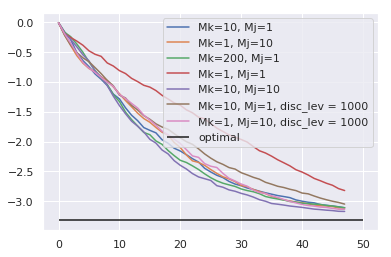

In [11]:
plt.plot(hartmann1_objs[:-2], label = 'Mk=10, Mj=1')
plt.plot(hartmann2_objs[:-2], label = 'Mk=1, Mj=10')
plt.plot(hartmann3_objs[:-2], label = 'Mk=200, Mj=1')
plt.plot(hartmann4_objs[:-2], label = 'Mk=1, Mj=1')
plt.plot(hartmann5_objs[:-2], label = 'Mk=10, Mj=10')
plt.plot(hartmann7_objs[:-2], label = 'Mk=10, Mj=1, disc_lev = 1000')
plt.plot(hartmann8_objs[:-2], label = 'Mk=1, Mj=10, disc_lev = 1000')
plt.hlines(xmin=0,xmax=50,y=opt_val,label='optimal')
plt.legend()

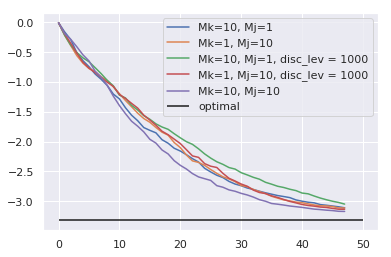

In [32]:
plt.plot(hartmann1_objs[:-2], label = 'Mk=10, Mj=1')
plt.plot(hartmann2_objs[:-2], label = 'Mk=1, Mj=10')
plt.plot(hartmann7_objs[:-2], label = 'Mk=10, Mj=1, disc_lev = 1000')
plt.plot(hartmann8_objs[:-2], label = 'Mk=1, Mj=10, disc_lev = 1000')
plt.plot(hartmann5_objs[:-2], label = 'Mk=10, Mj=10')
plt.hlines(xmin=0,xmax=50,y=opt_val,label='optimal')
plt.legend()

### Getting immediate Regret IR measure

In [12]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - hartmann(*input_list)))

In [13]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for locs in locs_cur_exp:
            irs_iter.append(log_ir(locs))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [14]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs

In [15]:
def get_avg_irs2(irs_exp):
    avg_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs

In [16]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs

In [17]:
def get_median_irs2(irs_exp):
    median_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs

In [18]:
locs1_exp = functions.get_recomm(recomm1_exp)
locs2_exp = functions.get_recomm(recomm2_exp)
locs3_exp = functions.get_recomm(recomm3_exp)
locs4_exp = functions.get_recomm(recomm4_exp)
locs5_exp = functions.get_recomm(recomm5_exp)
locs7_exp = functions.get_recomm(recomm7_exp)
locs8_exp = functions.get_recomm(recomm8_exp)

In [19]:
irs1_exp = get_irs_whole_exp(locs1_exp)
irs2_exp = get_irs_whole_exp(locs2_exp)
irs3_exp = get_irs_whole_exp(locs3_exp)
irs4_exp = get_irs_whole_exp(locs4_exp)
irs5_exp = get_irs_whole_exp(locs5_exp)
irs7_exp = get_irs_whole_exp(locs7_exp)
irs8_exp = get_irs_whole_exp(locs8_exp)

In [20]:
len(irs5_exp)

100

In [21]:
irs1_median = get_median_irs(irs1_exp)
irs2_median = get_median_irs(irs2_exp)
irs3_median = get_median_irs(irs3_exp)
irs4_median = get_median_irs(irs4_exp)
irs5_median = get_median_irs2(irs5_exp)
irs7_median = get_median_irs2(irs7_exp)
irs8_median = get_median_irs2(irs8_exp)

In [22]:
irs1_avg = get_avg_irs(irs1_exp)
irs2_avg = get_avg_irs(irs2_exp)
irs3_avg = get_avg_irs(irs3_exp)
irs4_avg = get_avg_irs(irs4_exp)
irs5_avg = get_avg_irs2(irs5_exp)
irs7_avg = get_avg_irs2(irs7_exp)
irs8_avg = get_avg_irs2(irs8_exp)

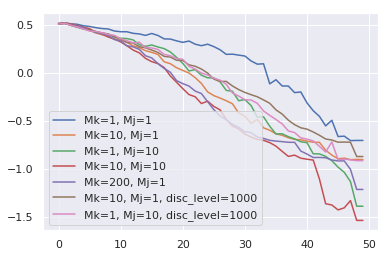

In [23]:
plt.plot(irs4_median, label = 'Mk=1, Mj=1')
plt.plot(irs1_median, label = 'Mk=10, Mj=1')
plt.plot(irs2_median, label = 'Mk=1, Mj=10')
plt.plot(irs5_median, label = 'Mk=10, Mj=10')
plt.plot(irs3_median, label = 'Mk=200, Mj=1')
plt.plot(irs7_median, label = 'Mk=10, Mj=1, disc_level=1000')
plt.plot(irs8_median, label = 'Mk=1, Mj=10, disc_level=1000')
plt.legend()

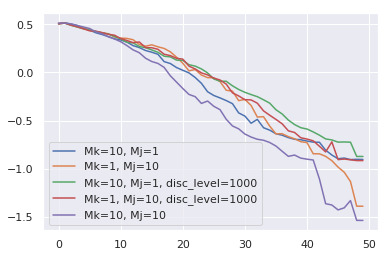

In [26]:
plt.plot(irs1_median, label='Mk=10, Mj=1')
plt.plot(irs2_median, label='Mk=1, Mj=10')
plt.plot(irs7_median, label='Mk=10, Mj=1, disc_level=1000')
plt.plot(irs8_median, label='Mk=1, Mj=10, disc_level=1000')
plt.plot(irs5_median, label='Mk=10, Mj=10')
plt.legend()

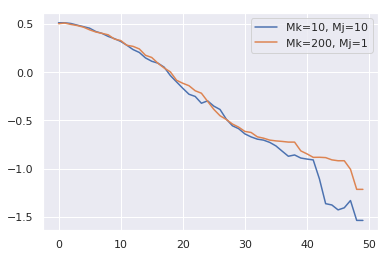

In [28]:
plt.plot(irs5_median, label = 'Mk=10, Mj=10')
plt.plot(irs3_median, label = 'Mk=200, Mj=1')
plt.legend()

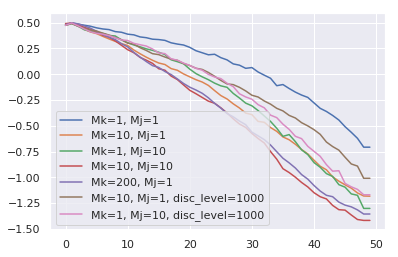

In [25]:
plt.plot(irs4_avg, label = 'Mk=1, Mj=1')
plt.plot(irs1_avg, label = 'Mk=10, Mj=1')
plt.plot(irs2_avg, label = 'Mk=1, Mj=10')
plt.plot(irs5_avg, label = 'Mk=10, Mj=10')
plt.plot(irs3_avg, label = 'Mk=200, Mj=1')
plt.plot(irs7_avg, label = 'Mk=10, Mj=1, disc_level=1000')
plt.plot(irs8_avg, label = 'Mk=1, Mj=10, disc_level=1000')
plt.legend()

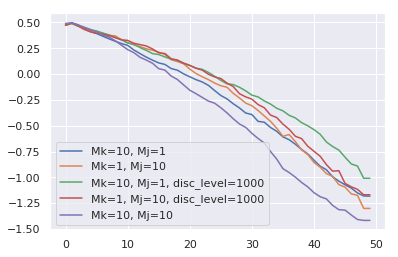

In [27]:
plt.plot(irs1_avg, label='Mk=10, Mj=1')
plt.plot(irs2_avg, label='Mk=1, Mj=10')
plt.plot(irs7_avg, label='Mk=10, Mj=1, disc_level=1000')
plt.plot(irs8_avg, label='Mk=1, Mj=10, disc_level=1000')
plt.plot(irs5_avg, label='Mk=10, Mj=10')
plt.legend()

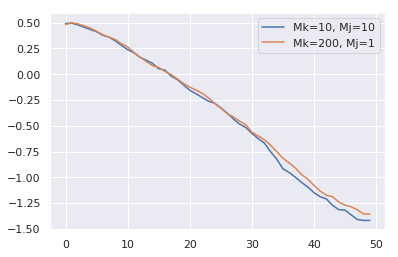

In [29]:
plt.plot(irs5_avg, label = 'Mk=10, Mj=10')
plt.plot(irs3_avg, label = 'Mk=200, Mj=1')
plt.legend()